In [ ]:
# PCA
import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import os


In [ ]:
iris_data=sb.load_dataset("iris")
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
iris_data["species"]=LB.fit_transform(iris_data.species)
iris_data
iris=[]
for i,j in iris_data.iterrows():
    print(i,j)

0 sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
species         0.0
Name: 0, dtype: float64
1 sepal_length    4.9
sepal_width     3.0
petal_length    1.4
petal_width     0.2
species         0.0
Name: 1, dtype: float64
2 sepal_length    4.7
sepal_width     3.2
petal_length    1.3
petal_width     0.2
species         0.0
Name: 2, dtype: float64
3 sepal_length    4.6
sepal_width     3.1
petal_length    1.5
petal_width     0.2
species         0.0
Name: 3, dtype: float64
4 sepal_length    5.0
sepal_width     3.6
petal_length    1.4
petal_width     0.2
species         0.0
Name: 4, dtype: float64
5 sepal_length    5.4
sepal_width     3.9
petal_length    1.7
petal_width     0.4
species         0.0
Name: 5, dtype: float64
6 sepal_length    4.6
sepal_width     3.4
petal_length    1.4
petal_width     0.3
species         0.0
Name: 6, dtype: float64
7 sepal_length    5.0
sepal_width     3.4
petal_length    1.5
petal_width     0.2
species         0.0
Name: 7, dtype: 

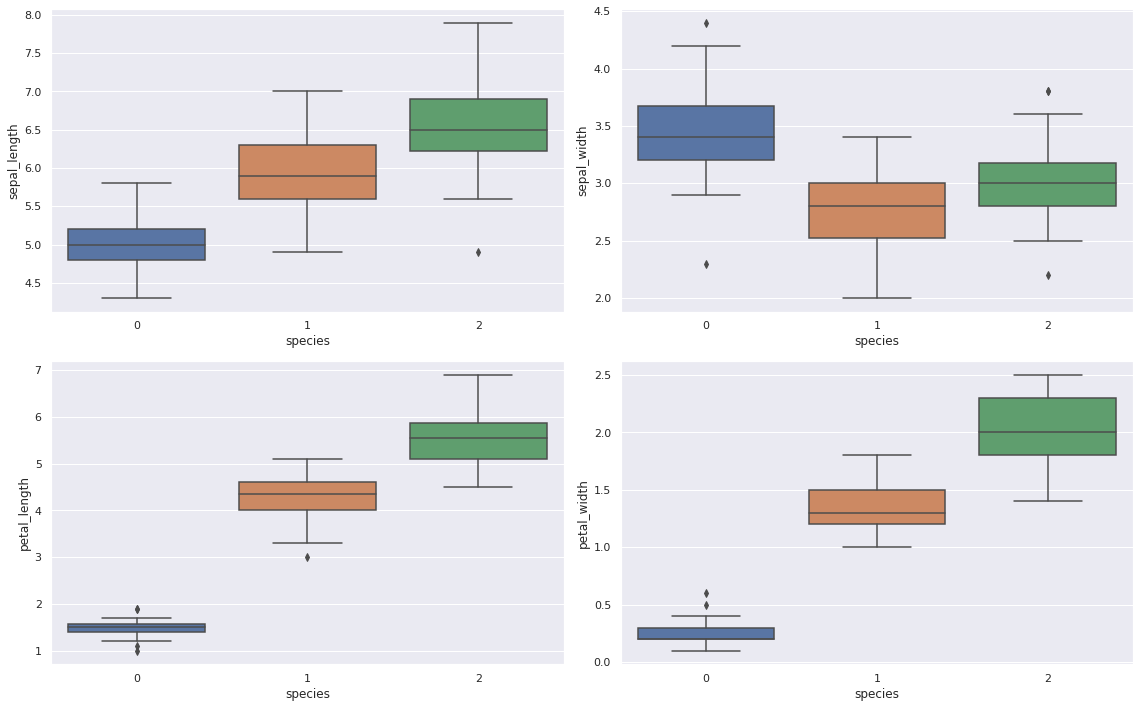

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(16,10))
row=0
col=0
for i in range(len(iris_data.columns)-1):
    if col>1:
      row+=1
      col=0
    axes=ax[row,col]
    sb.boxplot(x=iris_data["species"],y=iris_data[iris_data.columns[i]],ax=axes)
    col+=1
plt.tight_layout()
plt.show()

In [ ]:
x_ind=iris_data.drop(["species"],axis=1)
y_dep=iris_data.species

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x_ind)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
x_new=pca.fit_transform(x_scaler)
x_new

array([[-2.26470281e+00,  4.80026597e-01, -1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01, -2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01,  4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01,  9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01,  1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00,  2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02,  3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01, -8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00,  1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01, -2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00, -2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01,  9.37592444e-02,
      

In [ ]:
cov_mat=np.cov(x_scaler.T)
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)
print(eigen_vecs)

[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [ ]:
print(eigen_vals)

[2.93808505 0.9201649  0.14774182 0.02085386]


In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

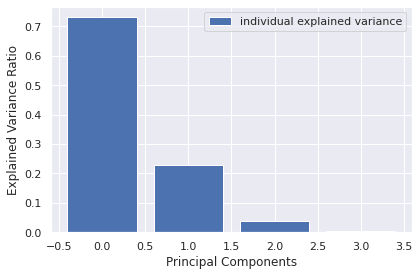

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(range(4),explained_variance,alpha=1.0,align="center",label="individual explained variance")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.legend(loc="best")
plt.tight_layout()

In [ ]:
pca=PCA(n_components=2)
x_new=pca.fit_transform(x_scaler)
x_new

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [ ]:
x_train_new,x_test_new,y_train,y_test=train_test_split(x_new,y_dep,test_size=0.2,random_state=1)


In [ ]:
knn_pca=KNeighborsClassifier(7)
knn_pca.fit(x_train_new,y_train)
print("Test Score after PCA",knn_pca.score(x_test_new,y_test),"%")

Test Score after PCA 0.9666666666666667 %
